Установка библиотек, необходимых для визуализации деревьев.

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
!conda install -c conda-forge python-graphviz
!conda install -c conda-forge pydotplus

# Classification

## Iris dataset

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
?tree

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [5]:
?tree.DecisionTreeClassifier()

Object `tree.DecisionTreeClassifier()` not found.


При выведении дерева чтобы увеличить масштаб, увеличиваем и размер фигуры и размер шрифта.

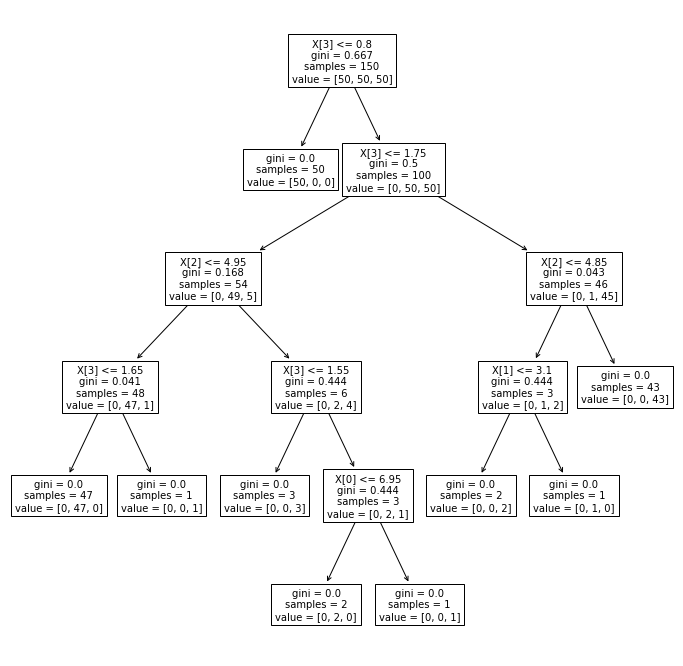

In [6]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)
plt.show()

Можем сохранить визуализацию в pdf

In [7]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

Можно разукрасить листья и ветви в зависимости от доминирующего класса и экспортировать в объект для визуализации.

In [8]:
dot_data = tree.export_graphviz(clf, 
                     out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)

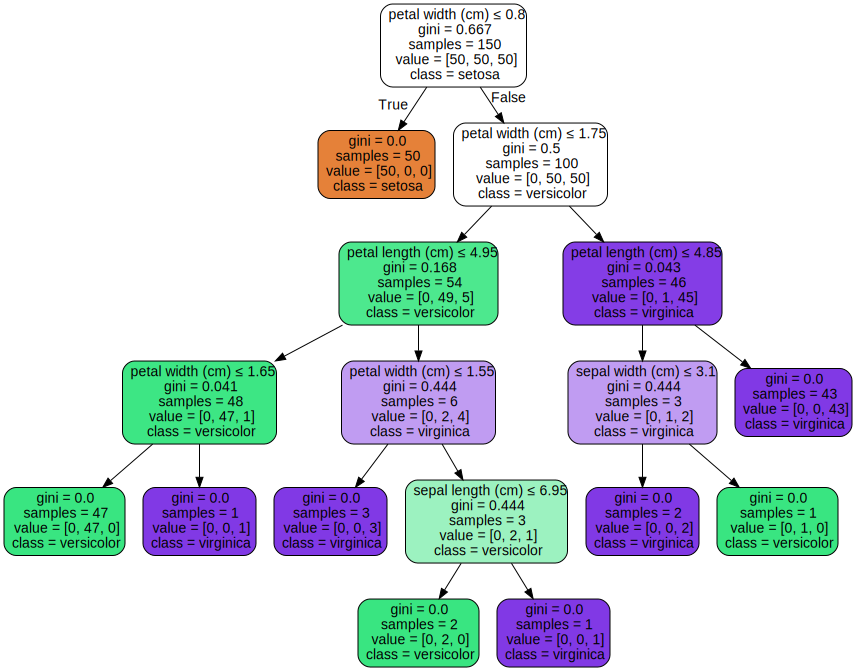

In [9]:
graph

Можем ограничить глубину, получить правила принятия решений из дерева:

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



Мы можем сгенерировать набор данных для классификации, чтобы проводить эксперименты и валидирвоать гипотезы:

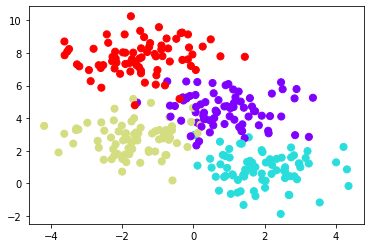

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

А так можно визуализировать границу принятия решений, построенную деревом:

In [12]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Отобразим тренировочные точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Обучаем модель
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Создаём цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

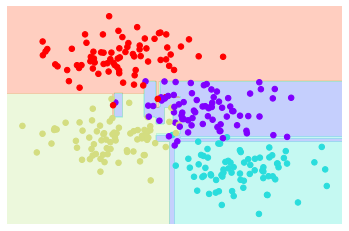

In [13]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## PIMA dataset

Описание набора данных PIMA (Pima Indians Diabetes Database): https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [15]:
df = pd.read_csv("../data/pima/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
feature_columns = np.setdiff1d(df.columns, 'Outcome')
X = df[feature_columns]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [17]:
clf = DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7186147186147186


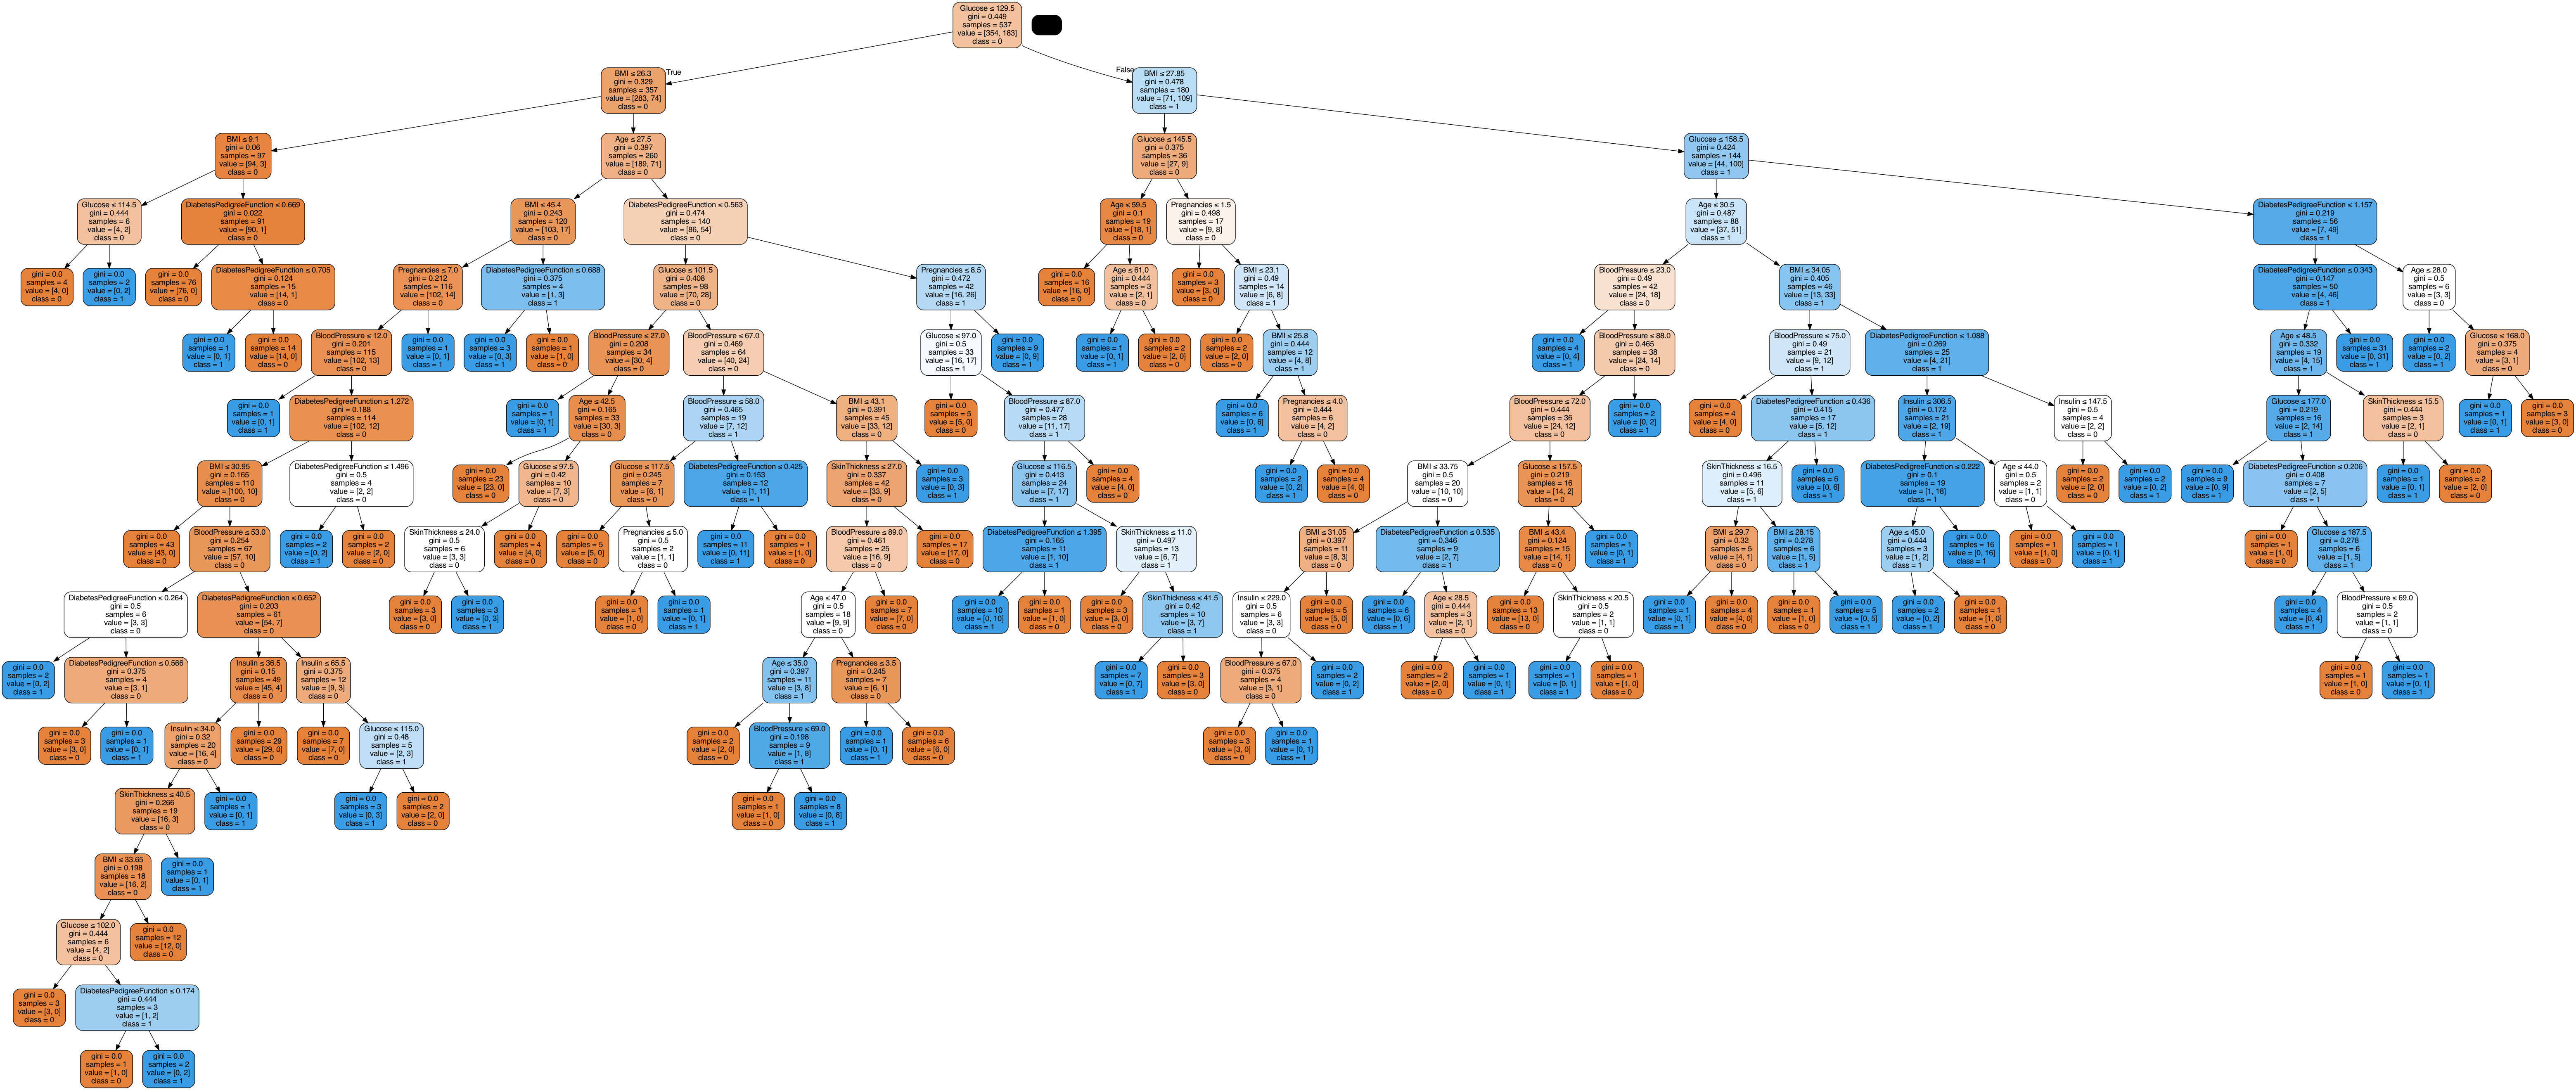

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_columns,
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Выявление важности признаков:

In [19]:
pd.DataFrame(zip(feature_columns, clf.feature_importances_), columns=['col name', 'feature importance']).style.background_gradient()

,col name,feature importance
0,Age,0.110522
1,BMI,0.179327
2,BloodPressure,0.141756
3,DiabetesPedigreeFunction,0.128500
4,Glucose,0.279911
5,Insulin,0.035721
6,Pregnancies,0.049234
7,SkinThickness,0.075030


# Regression

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

Создадим искусственный набор данных:

In [21]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [22]:
display(X.shape, y.shape)

(80, 1)

(80,)

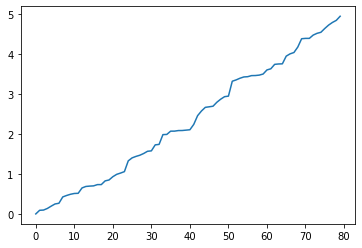

In [23]:
plt.plot(X);

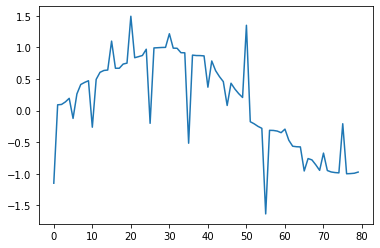

In [24]:
plt.plot(y);

Обучим две регрессионные модели с разной максимальной глубиной:

In [25]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

Найдём предсказания дерева для точек из интревала [0,5].

In [26]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

Визуализируем результаты.

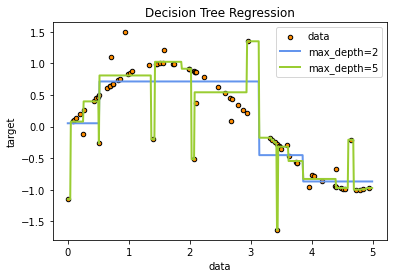

In [27]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()